# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [3]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [4]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [5]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
14256,Nine to Five,1980,Judy Bernly,woman,328,0.180319,43.0,333.0,4710
19803,The Other Guys,2010,Dr. Sheila Gamb,woman,219,0.020637,36.0,131.0,7627
15452,Twin Peaks: Fire Walk with Me,1992,Special Agent C,man,1211,0.126198,36.0,8.0,5166
6853,Gandhi,1982,Speaker In Jall,man,150,0.010707,NaN,NaN,2368
1290,Gattaca,1997,Irene Cassini,woman,458,0.084191,27.0,23.0,941
12946,The Godfather,1972,Carlo,man,134,0.010435,29.0,690.0,4277
22258,Anatomy of a Murder,1959,Paul Biegler,man,7296,0.400329,51.0,NaN,8699
4029,American Psycho,2000,Victoria,woman,150,0.008734,NaN,24.0,1639
13044,Halloween,2007,Laurie Strode,woman,1278,0.158521,18.0,73.0,4311
14597,Requiem for a Dream,2000,Big Tim,man,386,0.045626,44.0,5.0,4866


Generate information about all the columns in the data 

In [6]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'words'}>],
       [<AxesSubplot:title={'center':'proportion_of_dialogue'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'gross'}>,
        <AxesSubplot:title={'center':'script_id'}>]], dtype=object)

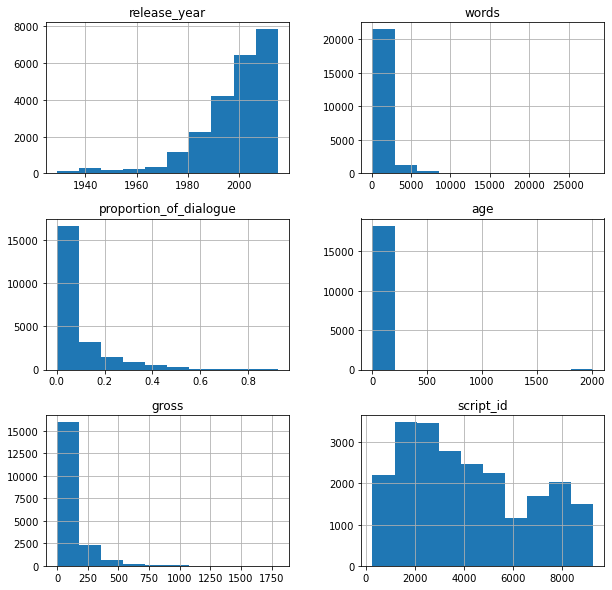

In [7]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [8]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

ENTER YOUR RESPONSE

--I see the top gender in the data set is man. I also notice that the average release year is 1998. A outlier I see is that one movie made
0.00 dollars in revenue

## Drop Rows

In [9]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [10]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [11]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [12]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [13]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [14]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [15]:
film_filter = film_df['title']=='The Matrix'

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [16]:
film_df[film_filter].sort_values(by='words', ascending = False)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
2096,The Matrix,1999,Morpheus,man,2123,0.371609,38.0,292.0,1141
2097,The Matrix,1999,Neo,man,995,0.174164,35.0,292.0,1141
2095,The Matrix,1999,Agent Smith,man,976,0.170838,39.0,292.0,1141
2100,The Matrix,1999,Trinity,woman,876,0.153335,32.0,292.0,1141
2099,The Matrix,1999,Tank,man,535,0.093646,32.0,292.0,1141
2098,The Matrix,1999,Oracle,woman,208,0.036408,66.0,292.0,1141


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [17]:
character_filter = film_df['character'] == 'Neo'

In [18]:
film_df[character_filter]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
2097,The Matrix,1999,Neo,man,995,0.174164,35.0,292.0,1141
2113,The Matrix Reloaded,2003,Neo,man,638,0.209112,39.0,405.0,1143


### ❓ How does this data align with your experience/knowledge of the film?

Enter your response 
--This data aligns with my knowledge of the film since Neo is the main character of the film, so he should be a character that has a lot of words said in the film. It also says that he is a man which is true because I saw the movie.

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

Enter your response
--These specific examples have amazed me in how data can efficiently be parsed to get the results you need. We see that Neo has been in two movies for the Matrix which is what I expected given the time the data was collected.

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [27]:
film_df.sort_values(by='proportion_of_dialogue', ascending = False)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
7242,Happy Feet,2006,Mumble,man,2677,0.923422,25.0,262.0,2483
16371,The End of the Tour,2015,David Lipsky,man,3117,0.911137,32.0,3.0,5485
21092,Duel,1971,David Mann,man,2660,0.881086,47.0,NaN,8164
3650,127 Hours,2010,Aron Ralston,man,4336,0.842760,32.0,20.0,1520
22236,Alfie,2004,Alfie,man,5852,0.814815,32.0,18.0,8683
21663,Mala Noche,1986,Walt,man,2093,0.810612,NaN,NaN,8423
1019,Duck Soup,1933,Groucho,man,3697,0.730344,NaN,NaN,873
4569,The Battle of Algiers,1966,Col. Mathieu,man,4962,0.723113,44.0,6.0,1780
17750,1408,2007,Mike Enslin,man,2338,0.703581,41.0,91.0,6537
18138,Jumpin' Jack Flash,1986,Terry Dolittle,woman,4722,0.699452,31.0,60.0,6798


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [28]:
film_df.sort_values(by='proportion_of_dialogue', ascending = True)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
5283,Casino,1995,Piscano'S Wife,woman,104,0.001537,NaN,84.0,1963
5272,Casino,1995,Frankie Avalon,man,106,0.001566,56.0,84.0,1963
5291,Casino,1995,Vinny Forlano,man,112,0.001655,NaN,84.0,1963
5262,Casino,1995,Cashier,woman,114,0.001684,NaN,84.0,1963
5277,Casino,1995,La Banker,man,114,0.001684,61.0,84.0,1963
5292,Casino,1995,Winner,man,116,0.001714,NaN,84.0,1963
5286,Casino,1995,Security Guard,man,116,0.001714,55.0,84.0,1963
8031,JFK,1991,Prison Guard,man,106,0.001802,NaN,145.0,2682
5258,Casino,1995,Anna Scott,woman,124,0.001832,NaN,84.0,1963
5257,Casino,1995,Amy Rothstein (,woman,130,0.001921,NaN,84.0,1963


Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [32]:
film_df.sort_values(by='words', ascending = True)[:20]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
15233,Sweeney Todd: The Demon Barber of Fleet Street,2007,Happy Customer',woman,101,0.011676,NaN,66.0,5083
20449,Lawless,2012,Danny,man,101,0.009168,46.0,40.0,7882
21869,Transcendence,2014,Martin,man,101,0.012063,44.0,24.0,8525
17979,My Best Friend's Birthday,1987,Cute Girl,woman,101,0.010254,NaN,NaN,6625
22909,The Utah Murder Project,2006,Deputy Bracken,man,101,0.008809,45.0,NaN,9214
18487,Inside Man,2006,Miriam Douglas,woman,101,0.008012,NaN,117.0,6968
17857,Searching for Bobby Fischer,1993,Tournament Dire,man,101,0.010766,53.0,15.0,6576
15725,"The Chronicles of Narnia: The Lion, the Witch ...",2005,Maugrim,man,101,0.021734,47.0,396.0,5300
16598,Pok�mon: The First Movie - Mewtwo Strikes Back,1998,Umio,man,101,0.032268,32.0,158.0,5523
1224,Forrest Gump,1994,Abbie Hoffman,man,101,0.011111,34.0,686.0,921


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

Enter your response

I notice that the Casino movie has a lot of characters who have almost no proportion to the dialogue. What didnt surprise me is that the main characters for these movies have more proportion of dialogue.

## Groupby

Group by film and then calculate the sum total for every column.

In [33]:
film_df.groupby('title').sum()

,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [37]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [38]:
film_df.groupby(['title','gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [39]:
women_filter = film_df['gender'] == 'woman'

In [40]:
women_film_df = film_df[women_filter]

Filter the DataFrame for only characters labeled as `man`

In [41]:
men_filter = film_df['gender'] == 'man'

In [42]:
men_film_df = film_df[men_filter]

Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [43]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [44]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [45]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [46]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [47]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [48]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice that generally most movies have men speaking a lot more than women. This shows us that men actors were significantly given more responsibility than women actors. This conclusion however can be deemed false depending on what society felt back then with these movies. 

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<AxesSubplot:title={'center':'Top 20 Women characters vs Words Spoken'}, xlabel='Charact', ylabel='Words Said'>

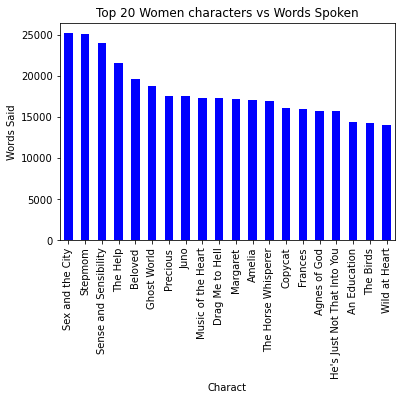

In [49]:
top20_women.plot(
    kind='bar',
    x='character',
    y='words',
    color='blue',
    title = 'Top 20 Women characters vs Words Spoken',
    xlabel='Charact',
    ylabel = 'Words Said'
    # Add your code/parameters
)

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

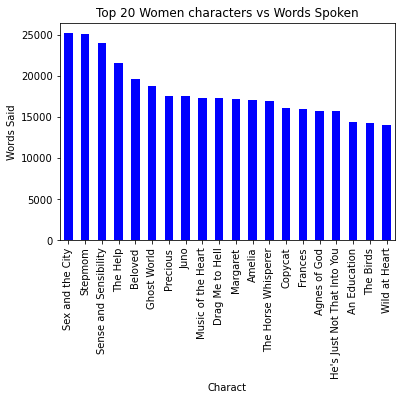

In [50]:
ax = top20_women.plot(
    kind='bar', 
    x='character',
    y='words',
    color='blue',
    title = 'Top 20 Women characters vs Words Spoken',
    xlabel='Charact',
    ylabel = 'Words Said'
    
)
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

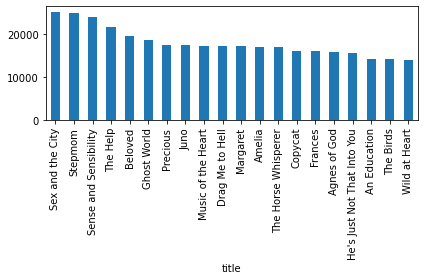

In [51]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [52]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [53]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [54]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<AxesSubplot:xlabel='age', ylabel='words'>

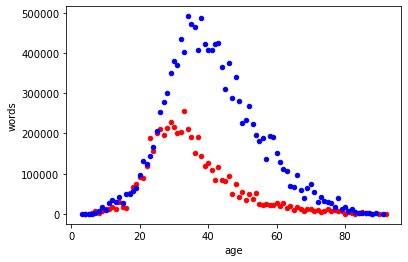

In [55]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<AxesSubplot:xlabel='age'>

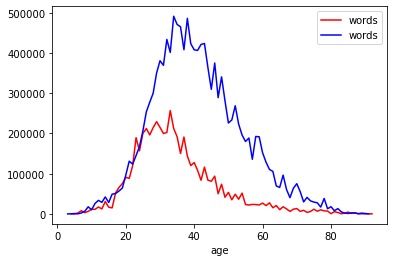

In [56]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?

I believe EDA techniques are very great for any projects or businesses who need to accomplish data analysis at a steady rate. After learning all of these techniques I feel very proud to be able to sort and parse data that is very large. For example, I easily navigated to the Matrix movie and learned all the details about the characters in the movie. It also told me fascinating things such as words said in the movie as well as the ages. I have used pandas before and I am very familiar to such techniques. The graphing utility seems to be the most impressive as it can be made in one line of code. I have also been learning SQL on the side to learn more about parsing data, because I plan on making a database one day and actually developing a full function full stack website. The exercises themselves were very engaging and easy to understand step-by-step. These techniques however leads to a discussion on ethic of expediency. The eases of sorting through a lot of data can easily undermine the value of each data point. Nan data points or data points that aren't the maximum or minimum may be undermined. Also the fact that pandas only shows you a few rows by default is also a flaw I see when traversing data like this. However since my goal is to become a software engineer, I see these skills to be very useful, and this class has already given me a different perspective on how ML and AI making can be vastly discussed on. 





### 2. What were some of the hurdles that you encountered moving through the EDA process?

Some hurdles I encountered were actually finding out how to sort some data using specific filters. When I first tried to retrieve data on the matrix I ran into a problem with sorting values by column rather than data frame which tripped me up for a good hour. Another hurdle I encountered was identifying why some of my values were deemed to be Nan. The data I was looking for was involved with grouping the titles and gender and find the sum of words based on each character in the films. I was new to using many functions to get one result so finding the right pattern of syntax deemed to be challenging. In order to overcome this obstacle I had to surf the web and also see if anyone had asked the same question I had in the help forum. I also had to make ethical considerations when working with the data such as taking in to account the women and men characters we had to sort through. I noticed that a lot of men had a lot of word per film than women, especially with films that are about women. Generalizations can easily be made about the data but it may not reflect what the data actually means between stakeholders. Taking in to account the technical aspects of the analysis and ethics was crucial to my EDA process. When I encountered all of these challenges, they provided me a good step in strengthening my data analysis and manipulation, ultimately aiding me in developing a good analysis. 

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

I chose to explore the matrix movie because it was one of my favorite movies for the time. I wanted to learn more about the information on the word count of each character and the roles that men and women had to play in the movie. I can see this bias of movie selection from what other companies that surf through lots of data since sorting and variable selection is bias overall. I also looked through proportion of dialogue for characters who took the spotlight in their respective movies. For example, Mumble from Happy feet took over 92% of the dialogue in the movie meaning he had to have a lot of words. I also saw that Jordan Belfort from The Wolf of Wall Street have around 68% of the dialogue. Most of these characters had a lot of words in their movies which is also the variable I chose to examine next. For future analysis I would look at the gross parameter to analyze trends based on the year the movie was made and how much money it produced at the box office. I would expect to see that over time, if the movie is closer to 2023, then the movie would make a lot more money since media is very large at this day and age and streaming services only multiply sales. I would also analyze the trend in what movies have made the most money based on the character with the most words gender. All of these are easily applicable since I have been able to learn how to group data.